# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

In [1]:
import numpy as np
from sklearn.svm import SVC
import itertools
import matplotlib.pyplot as plt

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2+1$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

<a href="https://ibb.co/2hsZ6HG"><img src="https://i.ibb.co/xLfFsdx/432176296-782992540034171-2712591105885664843-n.jpg" alt="432176296-782992540034171-2712591105885664843-n" border="0"></a>

iii) There is no such an example

iv) VC(F) = 4

### b)

In [42]:
def abline(svc, x_lim):
    """Plot a line from slope and intercept"""
    #axes = plt.gca()
    x_vals = np.array(x_lim)
    y_vals = -svc.intercept_[0] / svc.coef_[0][1] - svc.coef_[0][0] / svc.coef_[0][1] * x_vals
    plt.plot(x_vals, y_vals, '--')

In [67]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(d, n, S_n, plot=False):
    possible_class_assignment = [list(x) for x in itertools.product([0, 1], repeat=len(S_n))]

    result = True

    for y in possible_class_assignment:

        if np.asarray([i == y[0] for i in y]).all():
            continue

        svc = SVC(C=10000, shrinking=False, kernel='linear',
                  tol=1e-8)  #SVC(C=10000, shrinking=False, kernel='linear', tol=1e5)

        svc.fit(S_n, y)
        y_pred = svc.predict(S_n)

        if not all(y_pred == y):
            result = False

        if plot:
            plt.scatter(S_n[:, 0], S_n[:, 1], c=y)
            abline(svc, [-0.1, 1.1])
            plt.title(f'Separable = {all(y_pred == y)}')
            plt.show()

    return result

#     for y in different assigment of classes to points in S_n:
#         check if they are linearly separable
#         i.e. if we can fit a line so for the points in S_n with classes y the classification error is 0
#
#     if for at least for one y the answer is no, then return False, else return True
#     return True/False

In [68]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

### c)

In [69]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class switches,
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

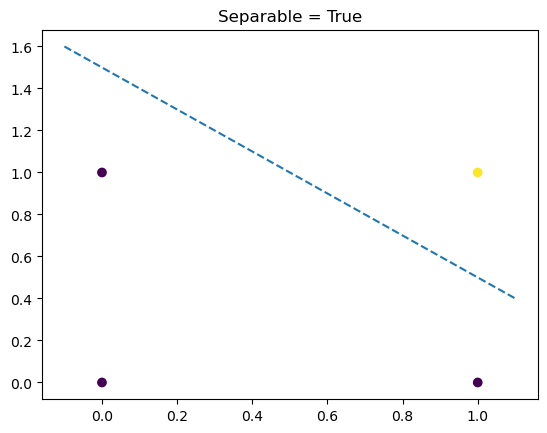

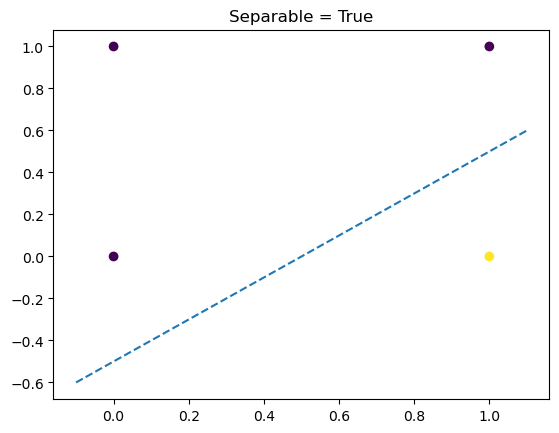

C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals
C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: invalid value encountered in subtract
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals


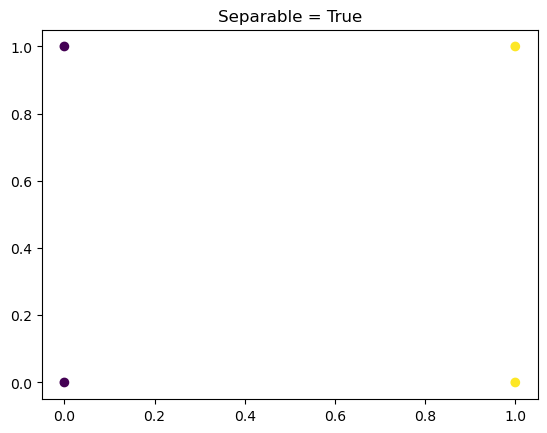

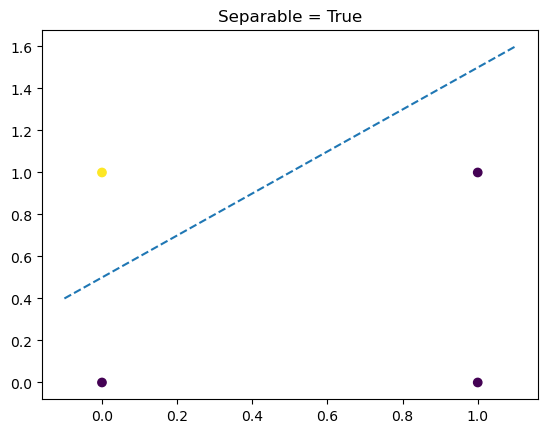

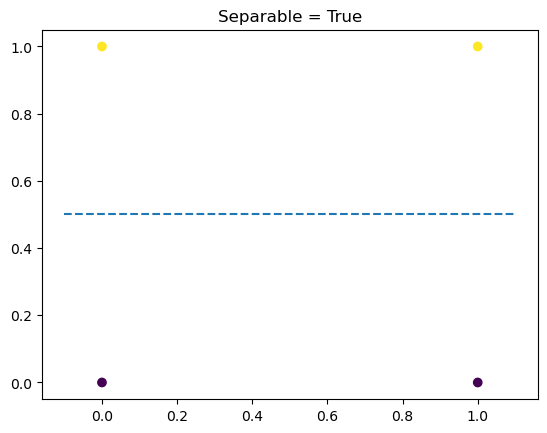

C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: invalid value encountered in double_scalars
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals


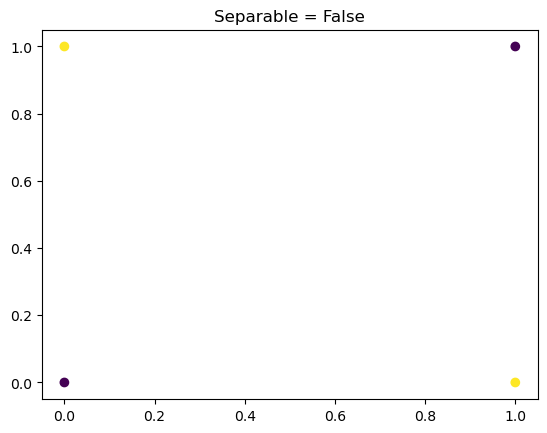

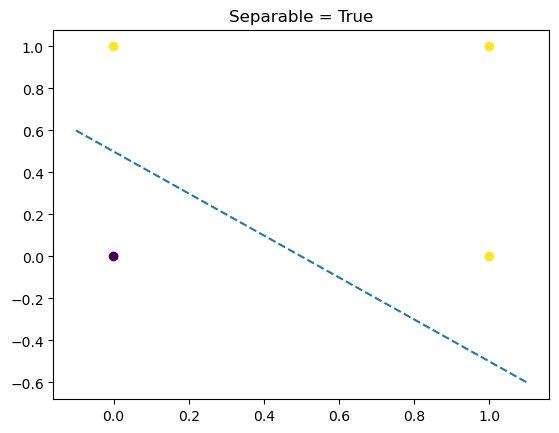

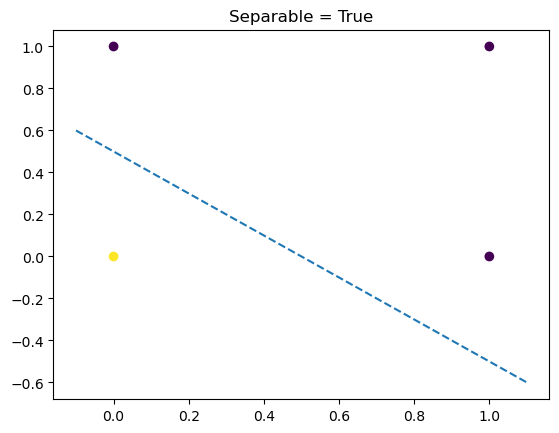

C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: invalid value encountered in double_scalars
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals


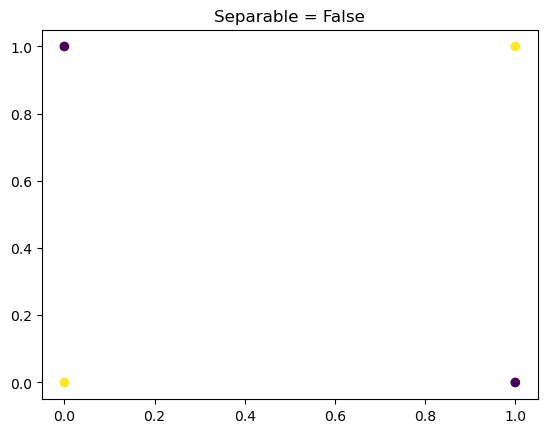

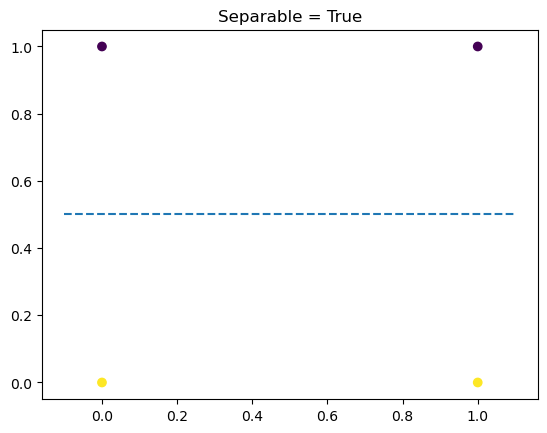

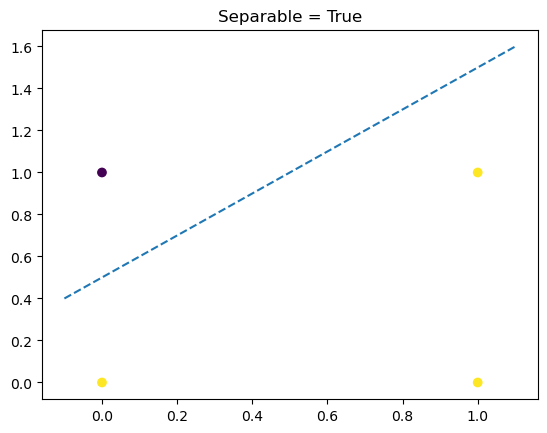

C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals
C:\Users\jakub\AppData\Local\Temp\ipykernel_11892\336384278.py:5: RuntimeWarning: invalid value encountered in subtract
  y_vals = -svc.intercept_[0]/svc.coef_[0][1] - svc.coef_[0][0]/svc.coef_[0][1] * x_vals


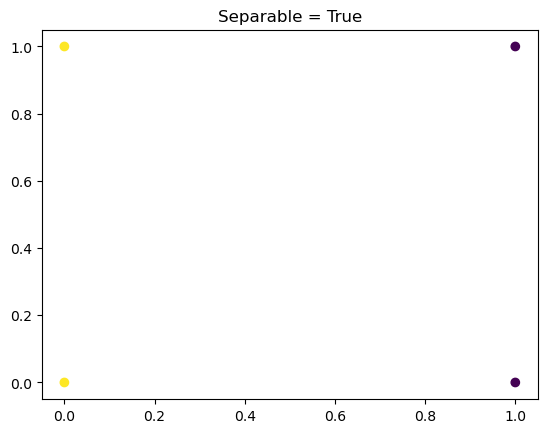

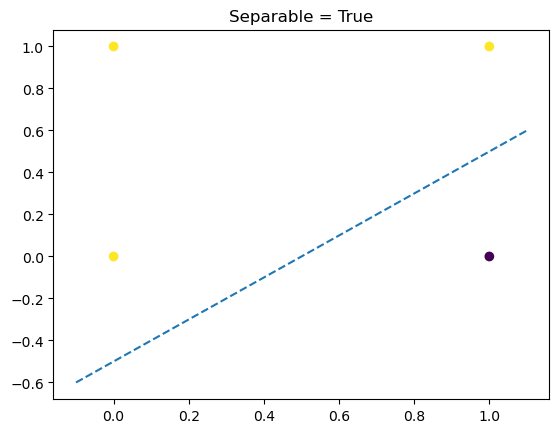

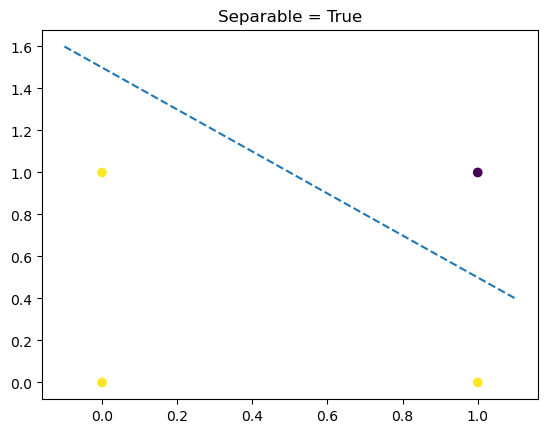

False

In [71]:
S_n = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
result = is_shattered(None, None, S_n, plot=True)
result

It works correctly. Trivial cases when all classes are the same are omitted. The line is not plotted when it is almost vertical but the result is correct.

### d)

In [82]:
# code


results = []
for d in range(2, 11):
    print(d)
    for n in range(2, 20):
        flag_did_we_find = False
        for _ in range(50):
            S = np.random.multivariate_normal(np.zeros(d), np.eye(d), n)
            if is_shattered(None, None, S):
                flag_did_we_find = True
                break

        if not flag_did_we_find:
            results.append((d, n))
            break
    print(results)

results = np.array(results)

2
[(2, 4)]
3
[(2, 4), (3, 5)]
4
[(2, 4), (3, 5), (4, 6)]
5
[(2, 4), (3, 5), (4, 6), (5, 7)]
6
[(2, 4), (3, 5), (4, 6), (5, 7), (6, 8)]
7
[(2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9)]
8
[(2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10)]
9
[(2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11)]
10
[(2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12)]


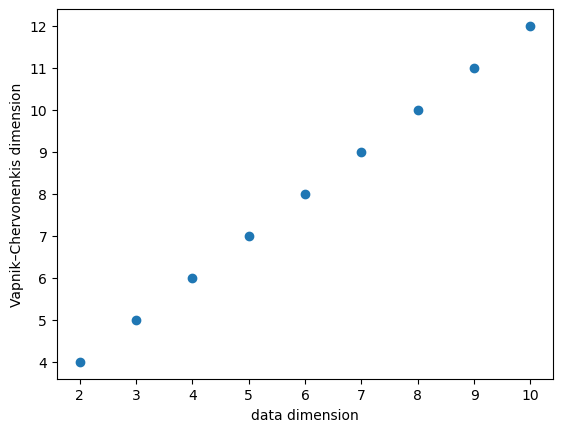

In [83]:
plt.scatter(results[:, 0], results[:, 1])
plt.xlabel("data dimension")
plt.ylabel("Vapnik–Chervonenkis dimension")
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM